<a href="https://colab.research.google.com/github/unicamp-dl/IA025_2022S1/blob/main/Final_project/Alexander_Valle/2delivery/IA02_delivery_2_part2_CNNT5_Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook of imagen Camptioning using a CNN with a pretrained T5 model

Alexander Valle Rey Sánchez RA230254

note: the download and dataloader functions of COCO dataset are from

https://colab.research.google.com/github/rammyram/image_captioning/blob/master/Image_Captioning.ipynb

these note book is usde when allready the COCO dataset was donwload an unsiped in floder in the google drive. so before use this note book use the notebook 
download an unzip coco that is this link:

https://github.com/unicamp-dl/IA025_2022S1/blob/main/Final_project/Alexander_Valle/2delivery/IA02_delivery_2_part1_COCO_downloading.ipynb

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers==2.9.0 
!pip install pytorch_lightning==0.7.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 635 kB 14.5 MB/s 
     |████████████████████████████████| 5.6 MB 67.7 MB/s 
     |████████████████████████████████| 1.2 MB 78.7 MB/s 
     |████████████████████████████████| 880 kB 74.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=56a632b1ebd82d311d2b33cdc145022795f96650bd5ccc67ef046b14f9d1dafe
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 233 kB 13.0 MB/s 
     |████████████████████████████████| 829 kB 93.7 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=e7071fe1af358a3905050d3c46c0e539a59677e5d424f4b727ec453f194dcb15
  Sto

In [ ]:
#!pip install sentencepiece
!pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 8.4 MB/s 


In [ ]:
!pip3 install -q --upgrade efficientnet_pytorch  \
                           transformers \
                           pytorch_lightning \
                           sacrebleu \
                           h5py

     |████████████████████████████████| 4.4 MB 19.1 MB/s 
     |████████████████████████████████| 585 kB 90.4 MB/s 
     |████████████████████████████████| 4.1 MB 32.1 MB/s 
     |████████████████████████████████| 6.6 MB 86.5 MB/s 
     |████████████████████████████████| 101 kB 15.4 MB/s 
     |████████████████████████████████| 596 kB 89.7 MB/s 
     |████████████████████████████████| 419 kB 94.8 MB/s 
     |████████████████████████████████| 140 kB 98.1 MB/s 
     |████████████████████████████████| 1.1 MB 67.7 MB/s 
     |████████████████████████████████| 144 kB 59.6 MB/s 
     |████████████████████████████████| 94 kB 4.7 MB/s 
     |████████████████████████████████| 271 kB 101.2 MB/s 


In [ ]:
import os
import torch

from transformers import T5ForConditionalGeneration, T5Tokenizer
from efficientnet_pytorch import EfficientNet
from matplotlib import pyplot as plt

from google.colab import drive


device = 'cuda' if torch.cuda.is_available() else 'cpu'

os.cpu_count(), torch.cuda.get_device_name() if device == "cuda" else None

(8, 'Tesla P100-PCIE-16GB')

In [ ]:
tokenizer = T5Tokenizer.from_pretrained('t5-small')


Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5.py:174: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


### Download the required data : Annotations,Captions,Images

In [ ]:
import os 
import sys
from pycocotools.coco import COCO
import urllib
import zipfile 

In [ ]:
os.chdir( '/content/drive/My Drive/IA025/image_captioning/COCO/' )
save_path = '/content/drive/My Drive/IA025/image_captioning/COCO/opt/'

os.makedirs('opt' , exist_ok=True)
#os.chdir( '/content/opt' )
os.chdir( save_path )

!git clone 'https://github.com/cocodataset/cocoapi.git'

fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [ ]:
"""

os.makedirs('opt' , exist_ok=True)
os.chdir( '/content/opt' )
!git clone 'https://github.com/cocodataset/cocoapi.git'

"""

"\n\nos.makedirs('opt' , exist_ok=True)\nos.chdir( '/content/opt' )\n!git clone 'https://github.com/cocodataset/cocoapi.git'\n\n"

Download the Annotations and Captions :

In [ ]:
os.chdir(save_path+'cocoapi')


In [ ]:
"""

os.chdir('/content/opt/cocoapi')

# Download the annotation : 
annotations_trainval2014 = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip'
image_info_test2014 = 'http://images.cocodataset.org/annotations/image_info_test2014.zip'

urllib.request.urlretrieve(annotations_trainval2014 , filename = 'annotations_trainval2014.zip' )
urllib.request.urlretrieve(image_info_test2014 , filename= 'image_info_test2014.zip' )



"""

"\n\nos.chdir('/content/opt/cocoapi')\n\n# Download the annotation : \nannotations_trainval2014 = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip'\nimage_info_test2014 = 'http://images.cocodataset.org/annotations/image_info_test2014.zip'\n\nurllib.request.urlretrieve(annotations_trainval2014 , filename = 'annotations_trainval2014.zip' )\nurllib.request.urlretrieve(image_info_test2014 , filename= 'image_info_test2014.zip' )\n\n"

Extract Annotations from ZIP file

In [ ]:
"""
with zipfile.ZipFile('annotations_trainval2014.zip' , 'r') as zip_ref:
  zip_ref.extractall( '/content/opt/cocoapi'  )  

try:
  os.remove( 'annotations_trainval2014.zip' )
  print('zip removed')
except:
  None

with zipfile.ZipFile('image_info_test2014.zip' , 'r') as zip_ref:
  zip_ref.extractall( '/content/opt/cocoapi'  )  

try:
  os.remove( 'image_info_test2014.zip' )
  print('zip removed')
except:
  None
"""  

"\nwith zipfile.ZipFile('annotations_trainval2014.zip' , 'r') as zip_ref:\n  zip_ref.extractall( '/content/opt/cocoapi'  )  \n\ntry:\n  os.remove( 'annotations_trainval2014.zip' )\n  print('zip removed')\nexcept:\n  None\n\nwith zipfile.ZipFile('image_info_test2014.zip' , 'r') as zip_ref:\n  zip_ref.extractall( '/content/opt/cocoapi'  )  \n\ntry:\n  os.remove( 'image_info_test2014.zip' )\n  print('zip removed')\nexcept:\n  None\n"

Initialize and verify the loaded data

In [ ]:
#os.chdir('/content/opt/cocoapi/annotations')
os.chdir(save_path+'cocoapi/annotations')

# initialize COCO API for instance annotations
dataType = 'val2014'
instances_annFile = 'instances_{}.json'.format(dataType)
print(instances_annFile)
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = 'captions_{}.json'.format(dataType)
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

instances_val2014.json
loading annotations into memory...
Done (t=6.70s)
creating index...
index created!
loading annotations into memory...
Done (t=1.02s)
creating index...
index created!


plot a sample Image

In [ ]:
import matplotlib.pyplot as plt 
import skimage.io as io 
import numpy as np 
%matplotlib inline 

http://images.cocodataset.org/val2014/COCO_val2014_000000566264.jpg
Number of annotations i.e captions for the image:  [76699, 82675, 84751, 85753, 88834]

A dog swimming in the ocean by itself.
A dog swimming in a large body of water.
a black and white photo of something partly submerged in a body of water
Dog in the process of swimming through a large body of water. 
An brown animal swimming in the ocean with only its head showing


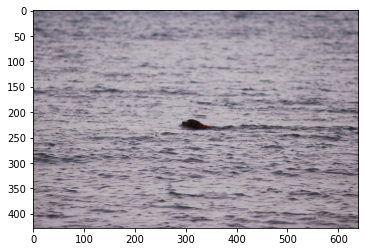

In [ ]:
#Pick a random annotation id and display img of that annotation  :
ann_id = np.random.choice( ids )
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs( img_id )[0]
url = img['coco_url']
print(url)
I = io.imread(url)
plt.imshow(I)

# Display captions for that annotation id :
ann_ids = coco_caps.getAnnIds( img_id   )
print('Number of annotations i.e captions for the image: ' , ann_ids)
print()
anns = coco_caps.loadAnns( ann_ids )
coco_caps.showAnns(anns)

Download Train , Test , Val Images :

In [ ]:
#os.chdir('/content/opt/cocoapi')
os.chdir(save_path+'cocoapi')
"""

train2014 = 'http://images.cocodataset.org/zips/train2014.zip'
test2014 = 'http://images.cocodataset.org/zips/test2014.zip'
val2014 = 'http://images.cocodataset.org/zips/val2014.zip'

#urllib.request.urlretrieve( train2014 , 'train2014' )
urllib.request.urlretrieve( test2014 , 'test2014' )
urllib.request.urlretrieve( val2014 , 'val2014' )
"""

"\n\ntrain2014 = 'http://images.cocodataset.org/zips/train2014.zip'\ntest2014 = 'http://images.cocodataset.org/zips/test2014.zip'\nval2014 = 'http://images.cocodataset.org/zips/val2014.zip'\n\n#urllib.request.urlretrieve( train2014 , 'train2014' )\nurllib.request.urlretrieve( test2014 , 'test2014' )\nurllib.request.urlretrieve( val2014 , 'val2014' )\n"

In [ ]:
#os.chdir('/content/opt/cocoapi')
os.chdir(save_path+'cocoapi')
"""

with zipfile.ZipFile( 'val2014' , 'r' ) as zip_ref:
  zip_ref.extractall( 'images' )

try:
  os.remove( 'val2014' )
  print('zip removed')
except:
  None
"""  

"\n\nwith zipfile.ZipFile( 'val2014' , 'r' ) as zip_ref:\n  zip_ref.extractall( 'images' )\n\ntry:\n  os.remove( 'val2014' )\n  print('zip removed')\nexcept:\n  None\n"

unzip the download image zip files 

In [ ]:
"""

os.chdir('/content/opt/cocoapi')
with zipfile.ZipFile( 'train2014' , 'r' ) as zip_ref:
  zip_ref.extractall( 'images' )

try:
  os.remove( 'train2014' )
  print('zip removed')
except:
  None


os.chdir('/content/opt/cocoapi')
with zipfile.ZipFile( 'test2014' , 'r' ) as zip_ref:
  zip_ref.extractall( 'images' )

try:
  os.remove( 'test2014' )
  print('zip removed')
except:
  None
  
"""

"\n\nos.chdir('/content/opt/cocoapi')\nwith zipfile.ZipFile( 'train2014' , 'r' ) as zip_ref:\n  zip_ref.extractall( 'images' )\n\ntry:\n  os.remove( 'train2014' )\n  print('zip removed')\nexcept:\n  None\n\n\nos.chdir('/content/opt/cocoapi')\nwith zipfile.ZipFile( 'test2014' , 'r' ) as zip_ref:\n  zip_ref.extractall( 'images' )\n\ntry:\n  os.remove( 'test2014' )\n  print('zip removed')\nexcept:\n  None\n  \n"

## Step1 Explore the DataLoader

### Vocabulary.py

In [ ]:
# vocabulary.py -------------------------------------------------------------
import nltk
import pickle
import os.path
from pycocotools.coco import COCO
from collections import Counter

class Vocabulary(object):

    def __init__(self,
        vocab_threshold,
        vocab_file='./vocab.pkl',
        start_word="<start>",
        end_word="<end>",
        unk_word="<unk>",
        annotations_file='../cocoapi/annotations/captions_train2014.json',
        vocab_from_file=False):
        """Initialize the vocabulary.
        Args:
          vocab_threshold: Minimum word count threshold.
          vocab_file: File containing the vocabulary.
          start_word: Special word denoting sentence start.
          end_word: Special word denoting sentence end.
          unk_word: Special word denoting unknown words.
          annotations_file: Path for train annotation file.
          vocab_from_file: If False, create vocab from scratch & override any existing vocab_file
                           If True, load vocab from from existing vocab_file, if it exists
        """
        self.vocab_threshold = vocab_threshold
        self.vocab_file = vocab_file
        self.start_word = start_word
        self.end_word = end_word
        self.unk_word = unk_word
        self.annotations_file = annotations_file
        self.vocab_from_file = vocab_from_file
        self.get_vocab()

    def get_vocab(self):
        """Load the vocabulary from file OR build the vocabulary from scratch."""
        if os.path.exists(self.vocab_file) & self.vocab_from_file:
            with open(self.vocab_file, 'rb') as f:
                vocab = pickle.load(f)
                self.word2idx = vocab.word2idx
                self.idx2word = vocab.idx2word
            print('Vocabulary successfully loaded from vocab.pkl file!')
        else:
            self.build_vocab()
            with open(self.vocab_file, 'wb') as f:
                pickle.dump(self, f)
        
    def build_vocab(self):
        """Populate the dictionaries for converting tokens to integers (and vice-versa)."""
        self.init_vocab()
        self.add_word(self.start_word)
        self.add_word(self.end_word)
        self.add_word(self.unk_word)
        self.add_captions()

    def init_vocab(self):
        """Initialize the dictionaries for converting tokens to integers (and vice-versa)."""
        self.word2idx = {}
        self.idx2word = {}
        self.idx = 0

    def add_word(self, word):
        """Add a token to the vocabulary."""
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            self.idx += 1

    def add_captions(self):
        """Loop over training captions and add all tokens to the vocabulary that meet or exceed the threshold."""
        coco = COCO(self.annotations_file)
        counter = Counter()
        ids = coco.anns.keys()
        for i, id in enumerate(ids):
            caption = str(coco.anns[id]['caption'])
            tokens = nltk.tokenize.word_tokenize(caption.lower())
            counter.update(tokens)

            if i % 100000 == 0:
                print("[%d/%d] Tokenizing captions..." % (i, len(ids)))

        words = [word for word, cnt in counter.items() if cnt >= self.vocab_threshold]

        for i, word in enumerate(words):
            self.add_word(word)

    def __call__(self, word):
        if not word in self.word2idx:
            return self.word2idx[self.unk_word]
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

### data_loader.py

In [ ]:
# Data Loader ---------------------------------------------------------------------------------------------

import nltk
import os
import torch
import torch.utils.data as data
from PIL import Image
from pycocotools.coco import COCO
import numpy as np
from tqdm import tqdm
import random
import json

def get_loader(transform,
               mode='val',
               batch_size=1,
               vocab_threshold=None,
               vocab_file='./vocab.pkl',
               start_word="<start>",
               end_word="<end>",
               unk_word="<unk>",
               vocab_from_file=True,
               num_workers=0,
               cocoapi_loc='/opt'):
    """Returns the data loader.
    Args:
      transform: Image transform.
      mode: One of 'train' or 'test'.
      batch_size: Batch size (if in testing mode, must have batch_size=1).
      vocab_threshold: Minimum word count threshold.
      vocab_file: File containing the vocabulary. 
      start_word: Special word denoting sentence start.
      end_word: Special word denoting sentence end.
      unk_word: Special word denoting unknown words.
      vocab_from_file: If False, create vocab from scratch & override any existing vocab_file.
                       If True, load vocab from from existing vocab_file, if it exists.
      num_workers: Number of subprocesses to use for data loading 
      cocoapi_loc: The location of the folder containing the COCO API: https://github.com/cocodataset/cocoapi
    """
    
    assert mode in ['val', 'test'], "mode must be one of 'train' or 'test'."
    if vocab_from_file==False: assert mode=='val', "To generate vocab from captions file, must be in training mode (mode='train')."

    # Based on mode (train, val, test), obtain img_folder and annotations_file.
    if mode == 'train':
        if vocab_from_file==True: assert os.path.exists(vocab_file), "vocab_file does not exist.  Change vocab_from_file to False to create vocab_file."
        img_folder = os.path.join(cocoapi_loc, 'cocoapi/images/train2014/')
        annotations_file = os.path.join(cocoapi_loc, 'cocoapi/annotations/captions_train2014.json')

    if mode == 'val':
        if vocab_from_file==True: assert os.path.exists(vocab_file), "vocab_file does not exist.  Change vocab_from_file to False to create vocab_file."
        img_folder = os.path.join(cocoapi_loc, 'cocoapi/images/val2014/')
        annotations_file = os.path.join(cocoapi_loc, 'cocoapi/annotations/captions_val2014.json')

    if mode == 'test':
        assert batch_size==1, "Please change batch_size to 1 if testing your model."
        assert os.path.exists(vocab_file), "Must first generate vocab.pkl from training data."
        assert vocab_from_file==True, "Change vocab_from_file to True."
        img_folder = os.path.join(cocoapi_loc, 'cocoapi/images/test2014/')
        annotations_file = os.path.join(cocoapi_loc, 'cocoapi/annotations/image_info_test2014.json')

    # COCO caption dataset.
    dataset = CoCoDataset(transform=transform,
                          mode=mode,
                          batch_size=batch_size,
                          vocab_threshold=vocab_threshold,
                          vocab_file=vocab_file,
                          start_word=start_word,
                          end_word=end_word,
                          unk_word=unk_word,
                          annotations_file=annotations_file,
                          vocab_from_file=vocab_from_file,
                          img_folder=img_folder)

    if mode == 'val':
        # Randomly sample a caption length, and sample indices with that length.
        indices = dataset.get_train_indices()
        # Create and assign a batch sampler to retrieve a batch with the sampled indices.
        initial_sampler = data.sampler.SubsetRandomSampler(indices=indices)
        # data loader for COCO dataset.
        data_loader = data.DataLoader(dataset=dataset, 
                                      num_workers=num_workers,
                                      batch_sampler=data.sampler.BatchSampler(sampler=initial_sampler,
                                                                              batch_size=dataset.batch_size,
                                                                              drop_last=False))
    else:
        data_loader = data.DataLoader(dataset=dataset,
                                      batch_size=dataset.batch_size,
                                      shuffle=True,
                                      num_workers=num_workers)

    return data_loader

class CoCoDataset(data.Dataset):
    
    def __init__(self, transform, mode, batch_size, vocab_threshold, vocab_file, start_word, 
        end_word, unk_word, annotations_file, vocab_from_file, img_folder):
        self.transform = transform
        self.mode = mode
        self.batch_size = batch_size
        self.vocab = Vocabulary(vocab_threshold, vocab_file, start_word,
            end_word, unk_word, annotations_file, vocab_from_file)
        self.img_folder = img_folder
        if self.mode == 'val':            
            self.coco = COCO(annotations_file)
            self.ids = list(self.coco.anns.keys())
            print('Obtaining caption lengths...')
            all_tokens = [nltk.tokenize.word_tokenize(str(self.coco.anns[self.ids[index]]['caption']).lower()) for index in tqdm(np.arange(len(self.ids)))]
            self.caption_lengths = [len(token) for token in all_tokens]
        else:
            test_info = json.loads(open(annotations_file).read())
            self.paths = [item['file_name'] for item in test_info['images']]
        
    def __getitem__(self, index):
        # obtain image and caption if in training mode
        if self.mode == 'val':
            ann_id = self.ids[index]
            caption = self.coco.anns[ann_id]['caption']
            img_id = self.coco.anns[ann_id]['image_id']
            path = self.coco.loadImgs(img_id)[0]['file_name']

            # Convert image to tensor and pre-process using transform
            image = Image.open(os.path.join(self.img_folder, path)).convert('RGB')
            image = self.transform(image)

            # Convert caption to tensor of word ids.
            tokens = nltk.tokenize.word_tokenize(str(caption).lower())
            caption = []
            caption.append(self.vocab(self.vocab.start_word))
            caption.extend([self.vocab(token) for token in tokens])
            caption.append(self.vocab(self.vocab.end_word))
            caption = torch.Tensor(caption).long()

            # return pre-processed image and caption tensors
            return image, caption

        # obtain image if in test mode
        else:
            path = self.paths[index]

            # Convert image to tensor and pre-process using transform
            PIL_image = Image.open(os.path.join(self.img_folder, path)).convert('RGB')
            orig_image = np.array(PIL_image)
            image = self.transform(PIL_image)

            # return original image and pre-processed image tensor
            return orig_image, image

    def get_train_indices(self):
        sel_length = np.random.choice(self.caption_lengths)
        all_indices = np.where([self.caption_lengths[i] == sel_length for i in np.arange(len(self.caption_lengths))])[0]
        indices = list(np.random.choice(all_indices, size=self.batch_size))
        return indices

    def __len__(self):
        if self.mode == 'val':
            return len(self.ids)
        else:
            return len(self.paths)

### Dataloader creation

Beacuse the train data set is to big we use the validation data set as train



In [ ]:
import sys
from pycocotools.coco import COCO
!pip install nltk
import nltk
nltk.download('punkt')
from torchvision import transforms


# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Set the minimum word count threshold.
vocab_threshold = 8




# Specify the batch size.
batch_size = 50

#train
# Obtain the data loader.
data_loader_train = get_loader(transform=transform_train,
                         mode='val',
                         batch_size=batch_size,
                         vocab_threshold=vocab_threshold,
                         vocab_from_file=False,
                         cocoapi_loc = save_path)#'/content/opt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


loading annotations into memory...
Done (t=0.31s)
creating index...
index created!
[0/202654] Tokenizing captions...
[100000/202654] Tokenizing captions...
[200000/202654] Tokenizing captions...
loading annotations into memory...
Done (t=0.31s)
creating index...
index created!
Obtaining caption lengths...


100%|██████████| 202654/202654 [00:19<00:00, 10303.48it/s]


In [ ]:
import torch 
import numpy as np 
import torch.utils.data as data

In [ ]:
# Exploring the dataloader now :


sample_caption = 'A person doing a trick xxxx on a rail while riding a skateboard.'
sample_tokens = nltk.tokenize.word_tokenize( sample_caption.lower() )

sample_caption = []
start_word  = data_loader_train.dataset.vocab.start_word
end_word = data_loader_train.dataset.vocab.end_word
sample_tokens.insert(0 , start_word)
sample_tokens.append(end_word)
sample_caption.extend( [ data_loader_train.dataset.vocab(token) for token in sample_tokens ] )


sample_caption = torch.Tensor( sample_caption ).long()
print('Find Below the Sample tokens and the idx values of those tokens in word2idx' , '\n')
print(sample_tokens) 
print(sample_caption )

print('Find index values for words below \n')
print('Start idx {} , End idx {} , unknown idx {}'.format( 0,1,2 ))

Find Below the Sample tokens and the idx values of those tokens in word2idx 

['<start>', 'a', 'person', 'doing', 'a', 'trick', 'xxxx', 'on', 'a', 'rail', 'while', 'riding', 'a', 'skateboard', '.', '<end>']
tensor([  0,   3, 173, 548,   3, 776,   2,  53,   3, 723, 301, 126,   3, 175,
         12,   1])
Find index values for words below 

Start idx 0 , End idx 1 , unknown idx 2


In [ ]:
# Lets check word2idx in vocb 
print('First few vocab' , dict(list(data_loader_train.dataset.vocab.word2idx.items())[:10]))
# Print the total number of keys in the word2idx dictionary.
print('Total number of tokens in vocabulary:', len(data_loader_train.dataset.vocab))

First few vocab {'<start>': 0, '<end>': 1, '<unk>': 2, 'a': 3, 'bicycle': 4, 'replica': 5, 'with': 6, 'clock': 7, 'as': 8, 'the': 9}
Total number of tokens in vocabulary: 5134


<a id='step2'></a>
## Step 2: Use the Data Loader to Obtain Batches

  

In [ ]:
from collections import Counter
counter = Counter(data_loader_train.dataset.caption_lengths)
lengths = sorted( counter.items() , key = lambda pair : pair[1] , reverse=True )
for val,count in lengths:
  print( 'value %2d  count %5d' %(val,count) )
  if count < 10000: 
    break

value 10  count 42260
value 11  count 39344
value  9  count 34992
value 12  count 28139
value 13  count 18330
value 14  count 10975
value  8  count 10209
value 15  count  6471


In [ ]:
os.chdir(save_path+'cocoapi')
# Randomly sample a caption length, and sample indices with that length.
indices = data_loader_train.dataset.get_train_indices()
print('Sample Indices:' , indices )

# Create and assign a batch sampler to retrieve a batch with the sampled indices.
sampler = data.sampler.SubsetRandomSampler(  indices )
data_loader_train.batch_sampler.sampler = sampler 


Sample Indices: [14396, 122732, 152802, 157698, 153473, 130921, 138519, 165485, 136650, 171864, 186268, 127061, 24715, 184439, 52600, 27769, 137867, 194237, 42219, 173713, 47137, 196983, 106917, 173762, 190102, 67648, 57456, 20208, 147283, 164488, 182479, 184695, 24901, 65061, 122439, 191609, 54652, 133494, 157875, 70374, 90125, 78803, 182329, 132416, 54059, 69669, 34998, 65736, 196656, 83264]


In [ ]:
%pwd

'/content/drive/MyDrive/IA025/image_captioning/COCO/opt/cocoapi'

In [ ]:
os.chdir(save_path+'cocoapi/images/val2014/')
# obtain images, caption :
images , captions = next(iter(data_loader_train))
print(images.shape , captions.shape)


torch.Size([50, 3, 224, 224]) torch.Size([50, 16])


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

## USE CNN stridep 16, 

In [ ]:
!pip install efficientnet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=c71b1edb353574bec7f52cac8c40c5259d86df028ce79d0a7f49a6aec0d7da87
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
Successfully built efficientnet-pytorch


In [ ]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 15.9 MB/s 


In [ ]:
import torchvision.models as models


In [ ]:
from timm import create_model
from efficientnet_pytorch import EfficientNet

##implementation of encoders



In [ ]:
class EncoderCNN1(nn.Module):
    # SimpleEncoder
    def __init__(self, embed_size):
        super(EncoderCNN1, self).__init__()
        EfficientNet=create_model('efficientnet_b3a', pretrained=True)
        for param in EfficientNet.parameters():
            param.requires_grad_(False)
        
        modules = list(EfficientNet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(EfficientNet.fc.in_features, embed_size)

    def forward(self, images):
        features = self.resnet(images)        
        features = features.view(features.size(0), -1)        
        features = self.embed(features)        
        return features

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

class EncoderCNN2(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        resnet = models.resnet50(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad_(False)
        
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.embed = nn.Linear(resnet.fc.in_features, embed_size)

    def forward(self, images):
        features = self.resnet(images)        
        features = features.view(features.size(0), -1)        
        features = self.embed(features)        
        return features

In [ ]:
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        super(EncoderCNN, self).__init__()
        self.f=8#factor internal emb
        self.ks=16# kernel_size choose a pair
        self.conv = nn.Conv2d(3, self.f, kernel_size=self.ks,  stride=self.ks)#,  dilation=1padding=0,bias=False,
        self.f2=(224//self.ks)**2
        self.embed= nn.Linear(self.f*self.f2, embed_size)

    def forward(self, images):
        features1 = self.conv(images)
        #print('images.shape',images.shape)
        #print('* features1.shape',features1.shape)        
        features1 = features1.view(features1.size(0), -1)   
        #print('+ features2.shape',features1.shape)        
        features1 = self.embed(features1)
        #print('# features3.shape',features1.shape) 
        return features1

In [ ]:
# specify dim of image embedding
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embed_size = 256 
encoder = EncoderCNN( embed_size )
encoder.to(device)
images=  images.to(device) # images from step2 
features = encoder(images)

print(type(features) , features.shape , images.shape)
assert( type(features) == torch.Tensor )  , 'Encoder output should be pytorch tensor'
assert (features.shape[0] == batch_size) & (features.shape[1] == embed_size) , "The shape of the encoder output is incorrect."

<class 'torch.Tensor'> torch.Size([50, 256]) torch.Size([50, 3, 224, 224])


In [ ]:
import os 
import torch.utils.data as data 
import torch 
import math
import pickle
import matplotlib.pyplot as plt 
% matplotlib inline

In [ ]:
from typing import List
import torch.nn.functional as F

## Model CNN+T5 (encoder+decoder)

In [ ]:
class CNNT5(torch.nn.Module):
    def __init__(self, tokenizer, pretrained_model,max_seq_length=32, image_size =224, patch_size=16, n_channels = 3, embed_size = 512):
        """
        Implements the CNN + T5 (encoder and decoder)."
        Args:            tokenizer: tokenizer used for encoding and decoding
        """
        super(CNNT5, self).__init__()

        self.max_seq_length = max_seq_length
        self.image_size = image_size
        self.nc = n_channels
        self.embed_size = embed_size
        self.patch_cnn = nn.Conv2d(self.nc, self.embed_size, kernel_size=patch_size, stride=patch_size)
        self.f=(image_size[0]//patch_size)**2
        self.w_embeddings = nn.Embedding(self.f, self.embed_size)

        self.pad_token_id = tokenizer.pad_token_id
        self.eos_token_id = tokenizer.eos_token_id
        self.decoder_t5 = T5ForConditionalGeneration.from_pretrained(pretrained_model)
        self.decoder_t5.config.eos_token_id = tokenizer.eos_token_id
        self.decoder_t5.config.pad_token_id = tokenizer.pad_token_id
        self.decoder_start_token_id = self.decoder_t5.config.decoder_start_token_id

    def encoder(self, images):
        #print('------ENCODER-------')
        #print('images.shape',images.shape)
        out = self.patch_cnn(images)
        #print('out0.shape',out.shape)
        out = out.permute(0, 2, 3, 1) 
        #print('out1.shape',out.shape)
        out  = out .reshape(out.shape[0], -1, self.embed_size)
        #print('out2.shape',out.shape)
        out+=self.w_embeddings.weight
        #print('out3.shape',out.shape)
        return out

    def forward(self, images = None, targets = None, decoder_ids = None):
        #print('++++++DECODER+++++++')
        features = self.encoder(images)
        #print('features.shape',features.shape)
        # condition from Larissa
        if decoder_ids is not None:
            out = self.decoder_t5(inputs_embeds=features, decoder_input_ids=decoder_ids)
        else:
            out = self.decoder_t5(inputs_embeds=features, labels=targets)
        #print('out.shape',out.shape)
        #print('')
        #print('')
        return out

### Choose a pretained model of T5

In [ ]:
embed_size = 256
hidden_size = 100
num_layers =1 
num_epochs = 1#4
print_every = 100
save_every = 25 
vocab_size = len(data_loader_train.dataset.vocab)
total_step = math.ceil( len(data_loader_train.dataset.caption_lengths) / data_loader_train.batch_sampler.batch_size   )

In [ ]:
model = CNNT5(tokenizer,'t5-small')
#tokenizer_base = T5Tokenizer.from_pretrained('t5-base') 
#tokenizer_large = T5Tokenizer.from_pretrained('t5-large')
#tokenizer_3b = T5Tokenizer.from_pretrained('t5-3b')
#tokenizer_11b = T5Tokenizer.from_pretrained('t5-11b')
#model_v1_1 = T5ForConditionalGeneration.from_pretrained('google/t5-v1_1-base', return_dict=True)
"""
T5v1.1 is an improved version of T5 with some architectural tweaks, and is pre-trained on C4 only without mixing in the supervised tasks
"""
#model_byt5 = T5ForConditionalGeneration.from_pretrained('google/byt5-small', return_dict=True)
"""
byT5 is a T5 model pre-trained on byte sequences rather than SentencePiece subword token sequences.
"""

In [ ]:
criterion = nn.CrossEntropyLoss()
lr = 0.001
all_params = list(model.parameters())  + list( encoder.embed.parameters() )
optimizer = torch.optim.Adam( params  = all_params , lr = lr  )
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
model_save_path = '/content/drive/My Drive/Colab Notebooks/ComputerVision/CNN_T5/image_caption/CVND---Image-Captioning-Project/checkpoint'
os.makedirs( model_save_path , exist_ok=True)
# Save the params needed to created the model :
model_input_params = {'embed_size' : embed_size , 
                'hidden_size' : hidden_size , 
                'num_layers' : num_layers,
                'lr' : lr ,
                'vocab_size' : vocab_size
                }

with open(  os.path.join(model_save_path , 'model_input_params_05_07_2022.pickle'), 'wb') as handle:
    pickle.dump(model_input_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!pip install sacrebleu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sacrebleu.metrics import BLEU 
import pandas as pd
bleu = BLEU()
bleu_score = []
losses_training = []
val_bleu_1=[]
val_bleu_4=[]
Epochs=[]
steps=[]
save_path = '/content/drive/My Drive/Colab Notebooks/ComputerVision/CNNT5/image_caption/'

In [ ]:
import sys 
for e in range(num_epochs):
  for step in range(total_step):
    indices = data_loader_train.dataset.get_train_indices()
    new_sampler = data.sampler.SubsetRandomSampler( indices )
    data_loader_train.batch_sampler.sampler = new_sampler    
    images,captions = next(iter(data_loader_train))    
    images , captions = images.to(device) , captions.to(device)
    #encoder , decoder = encoder.to(device) , decoder.to(device)
    model = model.to(device)

    #encoder.zero_grad()    
    #decoder.zero_grad()
    model.zero_grad()

    #features = encoder(images)
    #output = decoder( features , captions ) 
    output = model (images , captions )

    logits = output.logits
    train_preds = torch.argmax(logits, dim=-1)
    preds_sentences = tokenizer.batch_decode(train_preds,  skip_special_tokens=False) #returns a list

    labels = captions.clone()
    text=tokenizer.batch_decode(labels,  skip_special_tokens=False)
    bleu_result = bleu.corpus_score(preds_sentences, text)
    bleu_score.append(bleu_result.score)

    #print("val_bleu_score", bleu_result.score)
    #print("val_bleu_1", bleu_result.precisions[0])
    #print("val_bleu_4", bleu_result.precisions[3])
    val_bleu_1.append(bleu_result.precisions[0])
    val_bleu_4.append(bleu_result.precisions[3])

    loss = output.loss
    loss.backward()
    optimizer.step()
    losses_training.append(loss.item()) 

    #loss = criterion( output.view(-1, vocab_size) , captions.view(-1) )
    #loss.backward()
    #optimizer.step()
    Epochs.append( e+1) 
    steps.append(step) 
    stat_vals = 'Epochs [%d/%d] Step [%d/%d] Loss [%.4f] bleu [%.4f] bleu_1 [%.4f] bleu_4 [%.4f]' %( e+1,num_epochs,step,total_step,losses_training[-1],bleu_score[-1],val_bleu_1[-1],val_bleu_4[-1] )
    if step % print_every == 0 :
      print(stat_vals)
      sys.stdout.flush()
    if e % save_every == 0:
      torch.save( model.state_dict() ,  os.path.join( model_save_path , 'modeldata_{}.pkl'.format(e+1) ) )
      data = {'Epochs':Epochs,
              'num_epochs':[num_epochs for k in range(len(steps))] ,
              'step':steps,
              '[total_step':[total_step for k in range(len(losses_training))],
              'losses':losses_training,
              'bleu_score':bleu_score,
              'bleu1':val_bleu_1,
              'bleu4':val_bleu_4}
      #load data into a DataFrame object:
      df_metrics = pd.DataFrame(data)
      df_metrics.to_csv(save_path+'DF_metrics_experimets1.csv',index=False)



Epochs [1/1] Step [0/4054] Loss [9.6557] bleu [1.7762] bleu_1 [13.7255] bleu_4 [0.5952]
Epochs [1/1] Step [100/4054] Loss [4.7851] bleu [0.1977] bleu_1 [12.5214] bleu_4 [0.0268]
Epochs [1/1] Step [200/4054] Loss [4.4629] bleu [0.2507] bleu_1 [9.6939] bleu_4 [0.0402]
Epochs [1/1] Step [300/4054] Loss [3.7093] bleu [0.1967] bleu_1 [9.0385] bleu_4 [0.0295]
Epochs [1/1] Step [400/4054] Loss [3.9141] bleu [0.2957] bleu_1 [9.3548] bleu_4 [0.0506]
Epochs [1/1] Step [500/4054] Loss [3.7123] bleu [0.2516] bleu_1 [7.8804] bleu_4 [0.0436]
Epochs [1/1] Step [600/4054] Loss [3.3803] bleu [0.1574] bleu_1 [8.7977] bleu_4 [0.0219]
Epochs [1/1] Step [700/4054] Loss [3.5537] bleu [0.2614] bleu_1 [9.7297] bleu_4 [0.0424]
Epochs [1/1] Step [800/4054] Loss [3.2282] bleu [0.2091] bleu_1 [10.2410] bleu_4 [0.0306]
Epochs [1/1] Step [900/4054] Loss [3.8747] bleu [0.1199] bleu_1 [8.5864] bleu_4 [0.0152]
Epochs [1/1] Step [1000/4054] Loss [3.3176] bleu [0.1262] bleu_1 [7.5846] bleu_4 [0.0170]


In [ ]:
import os

save_path = '/content/drive/My Drive/Colab Notebooks/ComputerVision/CNN_T5/image_caption/'

os.chdir( save_path )


In [ ]:
import pandas as pd
df = pd.read_csv(save_path+'DF_metrics_experimets1.csv')
df.head()

,Step,total_step,Loss,bleu,bleu_1,bleu_4
0,0,4054,9.6557,1.7762,13.7255,0.5952
1,100,4054,4.7851,0.1977,12.5214,0.0268
2,200,4054,4.4629,0.2507,9.6939,0.0402
3,300,4054,3.7093,0.1967,9.0385,0.0295
4,400,4054,3.9141,0.2957,9.3548,0.0506


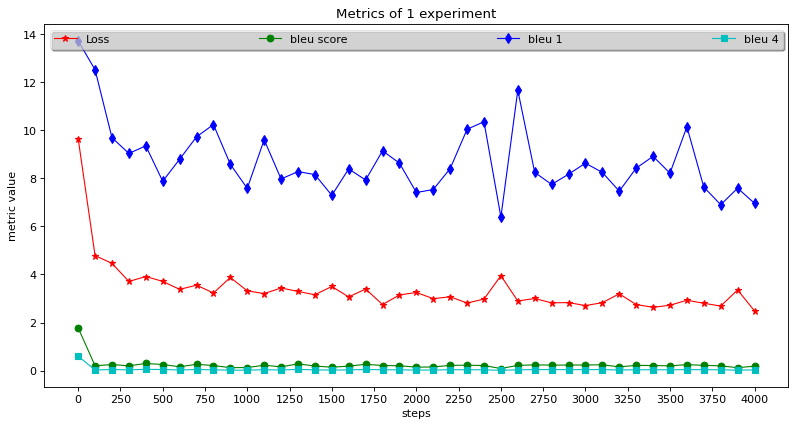

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(12, 6), dpi=80)
x=df['Step']
Loss=df['Loss']
bleu=df['bleu']
bleu1=df['bleu_1']
bleu4=df['bleu_4']
max(x)

plt.plot(x, Loss, "r*-", label='Loss', linewidth=1) # red line
plt.plot(x, bleu, 'go-', label='bleu score', linewidth=1) 
plt.plot(x, bleu1, 'bd-', label='bleu 1', linewidth=1) 
plt.plot(x, bleu4, 'cs-', label='bleu 4', linewidth=1) 
leg = plt.legend(loc='best', ncol=4, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.xlabel('steps')
plt.xticks(np.arange(0, max(x)+100, 250))
plt.ylabel('metric value')
plt.title('Metrics of 1 experiment')
plt.show()

Load the saved checkpoint 

In [ ]:
model_save_path = '/content/drive/My Drive/Colab Notebooks/ComputerVision/CNNT5/image_caption/CVND---Image-Captioning-Project/checkpoint/'
os.makedirs( model_save_path , exist_ok=True)

device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')

with open(  os.path.join(model_save_path , 'model_input_params_05_07_2022.pickle'), 'rb') as handle:
    decoder_input_params = pickle.load(handle)

embed_size = decoder_input_params['embed_size']
hidden_size= decoder_input_params['hidden_size']
vocab_size = decoder_input_params['vocab_size']
num_layers = decoder_input_params['num_layers']

model = CNNT5( embed_size , hidden_size , vocab_size , num_layers )
model.load_state_dict( torch.load(   os.path.join( model_save_path , 'modeldata_{}.pkl'.format(1) )   ) )

Create Dataloader for test data :

In [ ]:
from torchvision import transforms

# Define a transform to pre-process the training images.
transform_test = transforms.Compose([ 
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

# Obtain the data loader.test
data_loader_test = get_loader(transform=transform_test,
                         mode='test',                         
                         cocoapi_loc = save_path)#'/content/opt'

data_iter = iter(data_loader_test)

In [ ]:
def get_sentences( original_img, all_predictions ):
  sentence = ' '
  plt.imshow(original_img.squeeze())
  return sentence.join([data_loader_test.dataset.vocab.idx2word[idx] for idx in all_predictions[1:-1] ]  )

In [ ]:
model.to(device)
model.eval()
original_img , processed_img  = next( data_iter )

features  = encoder(processed_img.to(device)   ).unsqueeze(1)
final_output = model.Predict( features  , max_len=20)
get_sentences(original_img, final_output)